In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
ercot_2023 = pd.read_excel(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\load_data\Native_Load_2023.xlsx")
ercot_2022 = pd.read_excel(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\load_data\Native_Load_2022.xlsx")
ercot_2021 = pd.read_excel(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\load_data\Native_Load_2021.xlsx")
ercot_2020 = pd.read_excel(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\load_data\Native_Load_2020.xlsx")
ercot_2019 = pd.read_excel(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\load_data\Native_Load_2019.xlsx")
ercot_2018 = pd.read_excel(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\load_data\Native_Load_2018.xlsx")

In [25]:
#2021-2023 had different Hourending column names
ercot_2021 = ercot_2021.rename(columns = {'Hour Ending' : 'HourEnding'})
ercot_2022 = ercot_2022.rename(columns = {'Hour Ending' : 'HourEnding'})
ercot_2023 = ercot_2023.rename(columns = {'Hour Ending' : 'HourEnding'})

In [26]:
ercot_2023

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2023 01:00,8514.637876,1218.506271,5073.526557,917.394049,9896.757586,2859.017922,6012.400469,1116.933155,35609.173887
1,01/01/2023 02:00,8345.632899,1179.885576,5016.774637,906.854582,9675.869720,2845.779210,5934.084260,1107.417972,35012.298856
2,01/01/2023 03:00,8125.706879,1151.144653,5016.303220,894.817013,9490.332365,2734.163642,5855.790279,1101.324245,34369.582295
3,01/01/2023 04:00,7995.083655,1153.306928,5038.003823,891.733538,9420.890470,2555.339795,5840.914307,1105.457821,34000.730337
4,01/01/2023 05:00,7906.920393,1168.779618,4994.502755,896.893843,9430.780728,2484.777679,5873.683697,1108.739956,33865.078669
...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2023 20:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
8756,12/31/2023 21:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
8757,12/31/2023 22:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932
8758,12/31/2023 23:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370


In [27]:
full_load = pd.concat([ercot_2023, ercot_2022, ercot_2021, ercot_2020, ercot_2019, ercot_2018], ignore_index=True)
full_load['HourEnding'] = full_load['HourEnding'].str.replace('24:00', '23:59')
full_load['HourEnding'] = full_load['HourEnding'].str.replace(' DST', '')
full_load.loc[16776, 'HourEnding'] = '12/01/2022 01:00'
full_load.HourEnding = pd.to_datetime(full_load.HourEnding)
full_load = full_load.sort_values(by = 'HourEnding')
full_load = full_load.reset_index()
full_load = full_load.drop(columns = ['index'])
full_load

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370


In [28]:
weather_WEST = pd.read_csv(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\env_data\Abilene_weather(WEST).csv")
weather_NCENTRAL = pd.read_csv(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\env_data\DallasFortWorth_weather(NCENTRAL).csv")
weather_SCENTRAL = pd.read_csv(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\env_data\Austin_weather(SCENTRAL).csv")
weather_SOUTH = pd.read_csv(r"D:\OneDrive\Edward Gu\Cornell\CDS\Millennium Project\env_data\MCAllen_weather(SOUTH).csv")

In [29]:
weather_WEST.date = pd.to_datetime(weather_WEST.date)
weather_WEST = weather_WEST.drop(columns = ['Unnamed: 0'])

weather_NCENTRAL.date = pd.to_datetime(weather_NCENTRAL.date)
weather_NCENTRAL = weather_NCENTRAL.drop(columns = ['Unnamed: 0'])

weather_SCENTRAL.date = pd.to_datetime(weather_SCENTRAL.date)
weather_SCENTRAL = weather_SCENTRAL.drop(columns = ['Unnamed: 0'])

weather_SOUTH.date = pd.to_datetime(weather_SOUTH.date)
weather_SOUTH = weather_SOUTH.drop(columns = ['Unnamed: 0'])

In [90]:
weather_WEST

#leverage points --> for a given domain of variables, a specific y is not in range, but it may be in range for other variables --> remove
#outlier points --> target variable is OOD by 3SD --> remove

#use features other than just weather (take into account hourly data, season data, etc. instead)
#holiday affect --> loads should be less
#covid affect --> loads should be less

#AIC and BIC metrics
#use k-fold validation on different metrics
#one-hot encoded calendar encodings as features (patc)
#how to select a subset of variables for linreg
#try neural nets
#time-series approach


,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,wind_speed_10m,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm
0,2018-01-01 00:00:00,17.701700,55.313335,6.322010,0.0,0.0,0.0,0.0,18.643690,24.858253,35.640000,27.331700,38.491700,50.641700,65.3117
1,2018-01-01 01:00:00,17.971699,53.777622,7.256634,0.0,0.0,0.0,0.0,16.039202,22.314192,33.480000,27.421700,37.951700,50.551700,65.3117
2,2018-01-01 02:00:00,18.331700,47.720430,7.838177,0.0,0.0,0.0,0.0,14.764389,21.316135,31.319998,27.511700,37.411700,50.551700,65.3117
3,2018-01-01 03:00:00,18.601700,45.233654,7.118275,0.0,0.0,0.0,0.0,18.374111,26.727423,36.000000,27.601700,36.961700,50.461700,65.3117
4,2018-01-01 04:00:00,18.511700,44.463287,5.652844,0.0,0.0,0.0,0.0,23.535301,32.686733,38.519997,27.601700,36.511700,50.371700,65.2217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,58.741703,40.383984,53.947830,0.0,0.0,0.0,0.0,7.244860,8.217153,18.359999,57.571700,49.471700,55.951702,70.5317
52580,2023-12-31 20:00:00,59.731697,38.426563,54.674760,0.0,0.0,0.0,0.0,7.100310,8.287822,18.720000,59.731697,50.101700,55.951702,70.5317
52581,2023-12-31 21:00:00,60.361702,37.709805,54.839317,0.0,0.0,0.0,0.0,7.968939,9.227524,18.000000,60.811700,50.821700,55.951702,70.5317
52582,2023-12-31 22:00:00,59.731697,39.543457,53.762340,0.0,0.0,0.0,0.0,10.080000,12.240000,18.720000,60.451700,51.541702,55.951702,70.4417


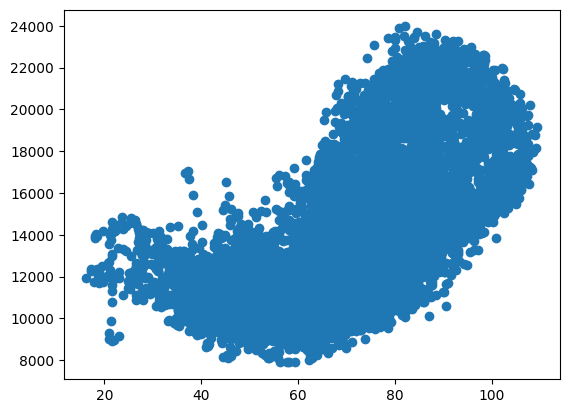

In [30]:
#COAST:
full_load
weather_WEST

plt.plot(weather_WEST[weather_WEST['date'].dt.year == 2023].temperature_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 


(array([ 104.,  725., 1119., 1348., 1395., 1210.,  934.,  832.,  762.,
         331.]),
 array([  3.805819 ,  13.4252371,  23.0446552,  32.6640733,  42.2834914,
         51.9029095,  61.5223276,  71.1417457,  80.7611638,  90.3805819,
        100.       ]),
 <BarContainer object of 10 artists>)

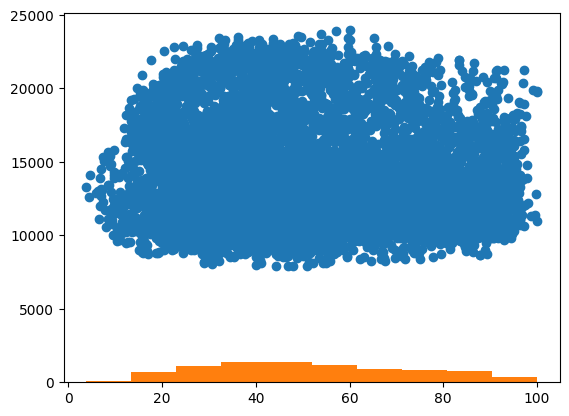

In [31]:
plt.plot(weather_WEST[weather_WEST['date'].dt.year == 2023].relative_humidity_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 

plt.hist(weather_WEST[weather_WEST['date'].dt.year == 2023].relative_humidity_2m) 

(array([ 414., 1445., 1744., 1881., 1568.,  994.,  420.,  202.,   70.,
          22.]),
 array([ 0.35999998,  4.92031298,  9.48062598, 14.04093899, 18.60125199,
        23.16156499, 27.72187799, 32.28219099, 36.842504  , 41.402817  ,
        45.96313   ]),
 <BarContainer object of 10 artists>)

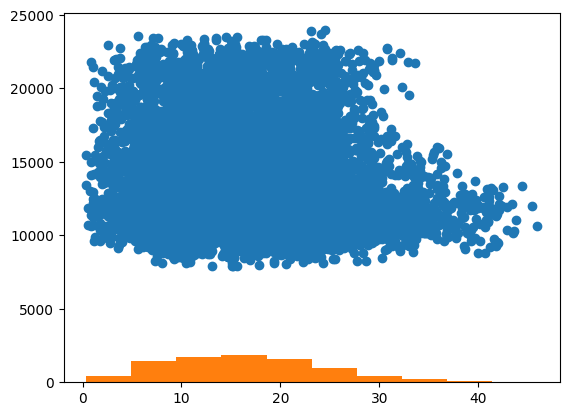

In [32]:
plt.plot(weather_WEST[weather_WEST['date'].dt.year == 2023].wind_speed_10m,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 
plt.hist(weather_WEST[weather_WEST['date'].dt.year == 2023].wind_speed_10m) 

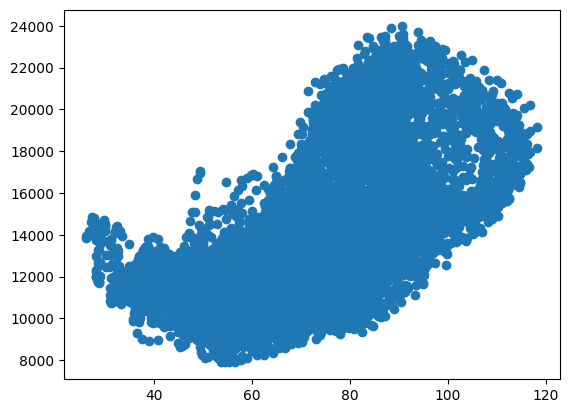

In [33]:
plt.plot(weather_WEST[weather_WEST['date'].dt.year == 2023].soil_temperature_0_to_7cm,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 

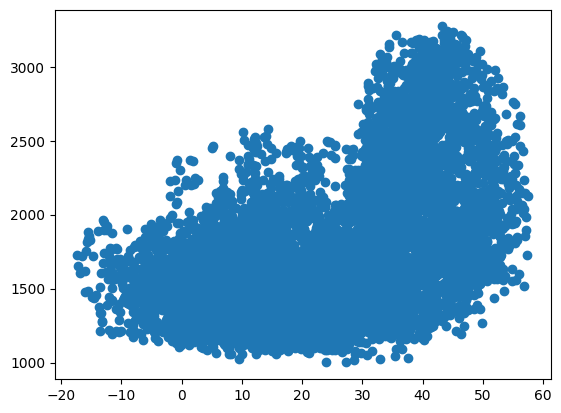

In [34]:
#EAST

plt.plot(weather_NCENTRAL[weather_NCENTRAL['date'].dt.year == 2023].temperature_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].EAST, 
          'o')

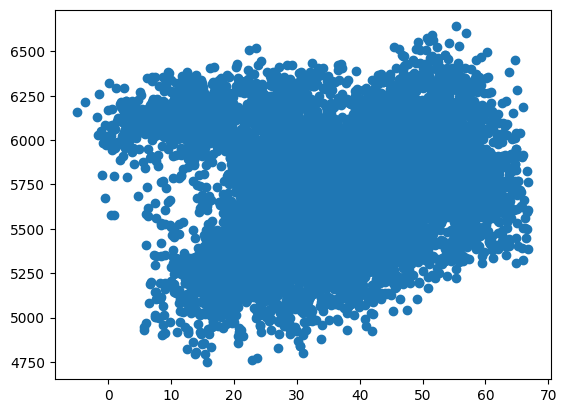

In [35]:
#FWEST

plt.plot(weather_SCENTRAL[weather_SCENTRAL['date'].dt.year == 2023].temperature_2m,
    full_load[full_load['HourEnding'].dt.year == 2023].FWEST, 
          'o')

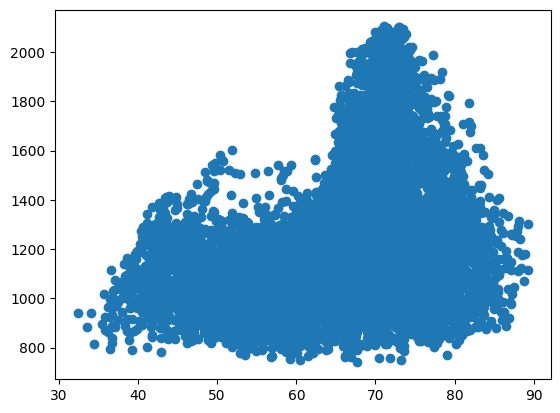

In [36]:
#NORTH
plt.plot(weather_SOUTH[weather_SOUTH['date'].dt.year == 2023].temperature_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].NORTH, 
          'o')

In [42]:
def get_season(date):
    year = date.year
    seasons = {
        'Winter': (pd.Timestamp(year=year, month=12, day=1), pd.Timestamp(year=year, month=12, day=31)),
        'Winter': (pd.Timestamp(year=year, month=1, day=1), pd.Timestamp(year=year, month=3, day=20)),
        'Spring': (pd.Timestamp(year=year, month=3, day=21), pd.Timestamp(year=year, month=6, day=20)),
        'Summer': (pd.Timestamp(year=year, month=6, day=21), pd.Timestamp(year=year, month=9, day=20)),
        'Fall': (pd.Timestamp(year=year, month=9, day=21), pd.Timestamp(year=year, month=12, day=20))
    }
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter' # Default to Winter

# Apply the function to create a 'Season' column
full_load['Season'] = full_load['HourEnding'].apply(get_season)

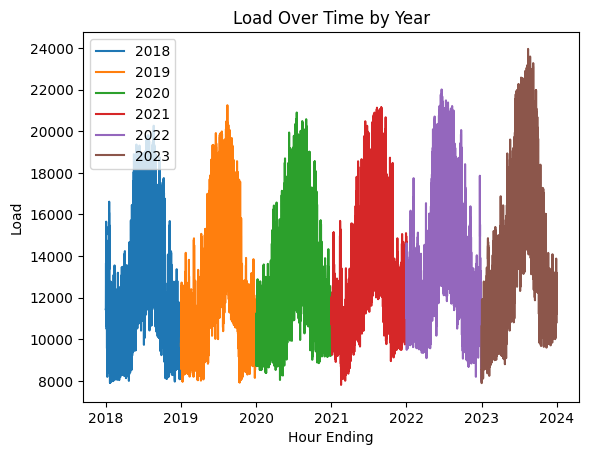

In [45]:
import matplotlib.pyplot as plt

# Loop over each year and plot the data
for year in range(2018, 2024):
    # Filter the DataFrame for the specific year
    df_year = full_load[full_load['HourEnding'].dt.year == year]
    
    # Plot the data
    plt.plot(df_year['HourEnding'], df_year['COAST'], label=str(year))

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Hour Ending')
plt.ylabel('Load')
plt.title('Load Over Time by Year')

# Show the plot
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'HourEnding' and 'date' columns are datetime and can be directly compared
# Step 1: Filter for winter season
winter_load = full_load[full_load['Season'] == 'Winter']

# Step 2: Align 'HourEnding' and 'date' columns if necessary (this code assumes they are aligned)

# Step 3: Merge the DataFrames
merged_df = pd.merge(winter_load, weather_SOUTH, left_on='HourEnding', right_on='date')

# Define the feature columns (all columns from weather_SOUTH except 'date')
feature_columns = ['temperature_2m', 'relative_humidity_2m',
                   'apparent_temperature', 'precipitation', 'rain', 'snowfall',
                   'snow_depth', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m',
                   'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
                   'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']

X = merged_df[feature_columns]
y = merged_df['SOUTH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha = 5.0
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
# model = LinearRegression()
# model.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# coefficients = model.coef_
# intercept = model.intercept_

# print("Coefficients:")
# for i, feature in enumerate(feature_columns):
#     print(f"{feature}: {coefficients[i]}")
# print(f"Intercept: {intercept}")


Mean Squared Error: 370859.2153205788


In [74]:
import statsmodels.api as sm

# Add a constant to the features since statsmodels' OLS doesn't include it by default
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print out the summary which includes the p-values
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  SOUTH   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     135.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:05:01   Log-Likelihood:                -80474.
No. Observations:               10280   AIC:                         1.610e+05
Df Residuals:                   10265   BIC:                         1.611e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Create the selector
selector = SelectKBest(f_regression, k=2)

# Fit the selector
selector.fit(X, y)

# Get the p-values
pvalues = selector.pvalues_

# Print the p-values
print(pvalues)

[1.99894930e-010 7.09636424e-071 9.47571742e-006 1.31835652e-012
 1.54562488e-012 3.21619306e-002 6.18102592e-002 2.66976220e-028
 9.17986825e-014 8.08964503e-026 1.45327621e-024 1.13434326e-202
 2.71362597e-110 1.92405228e-022]


In [81]:
feature_columns = ['temperature_2m', 'relative_humidity_2m',
                   'apparent_temperature', 'precipitation', 'rain', 'snowfall',
                   'snow_depth', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m',
                   'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
                   'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']

all_correlations = {}
weather_2023 = weather_SOUTH[weather_SOUTH['date'].dt.year == 2023]
for i in feature_columns:
  for j in feature_columns:
    if i != j:  # Exclude self-correlation
      correlation = weather_2023[i].corr(weather_2023[j])
      all_correlations[(i, j)] = correlation

all_correlations

c:\Users\eguac\Anaconda3\envs\millennium\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\eguac\Anaconda3\envs\millennium\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


{('temperature_2m', 'relative_humidity_2m'): -0.3401729843277425,
 ('temperature_2m', 'apparent_temperature'): 0.986014417198624,
 ('temperature_2m', 'precipitation'): 0.09865905643875984,
 ('temperature_2m', 'rain'): 0.09865905643875984,
 ('temperature_2m', 'snowfall'): nan,
 ('temperature_2m', 'snow_depth'): nan,
 ('temperature_2m', 'wind_speed_10m'): -0.4231892052228817,
 ('temperature_2m', 'wind_speed_100m'): -0.4978034700130145,
 ('temperature_2m', 'wind_gusts_10m'): -0.0357376359728862,
 ('temperature_2m', 'soil_temperature_0_to_7cm'): 0.9228219014885516,
 ('temperature_2m', 'soil_temperature_7_to_28cm'): 0.6809590788195918,
 ('temperature_2m', 'soil_temperature_28_to_100cm'): 0.6229603422121384,
 ('temperature_2m', 'soil_temperature_100_to_255cm'): 0.2663184932958697,
 ('relative_humidity_2m', 'temperature_2m'): -0.34017298432774257,
 ('relative_humidity_2m', 'apparent_temperature'): -0.18767191830679097,
 ('relative_humidity_2m', 'precipitation'): 0.21851273847774175,
 ('relati

In [86]:
top_correlations = {pair: corr for pair, corr in all_correlations.items() if corr > 0.7}

top_correlations

{('temperature_2m', 'apparent_temperature'): 0.986014417198624,
 ('temperature_2m', 'soil_temperature_0_to_7cm'): 0.9228219014885516,
 ('apparent_temperature', 'temperature_2m'): 0.986014417198624,
 ('apparent_temperature', 'soil_temperature_0_to_7cm'): 0.9584778673150902,
 ('apparent_temperature', 'soil_temperature_7_to_28cm'): 0.7711540054847331,
 ('apparent_temperature', 'soil_temperature_28_to_100cm'): 0.7169227058601798,
 ('precipitation', 'rain'): 1.0,
 ('rain', 'precipitation'): 1.0,
 ('wind_speed_10m', 'wind_speed_100m'): 0.8369916704045358,
 ('wind_speed_100m', 'wind_speed_10m'): 0.8369916704045357,
 ('soil_temperature_0_to_7cm', 'temperature_2m'): 0.9228219014885516,
 ('soil_temperature_0_to_7cm', 'apparent_temperature'): 0.9584778673150902,
 ('soil_temperature_0_to_7cm',
  'soil_temperature_7_to_28cm'): 0.8780987544712119,
 ('soil_temperature_0_to_7cm',
  'soil_temperature_28_to_100cm'): 0.8057781611832703,
 ('soil_temperature_7_to_28cm', 'apparent_temperature'): 0.771154005

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming weather_SOUTH is the DataFrame with the relevant features

# Standardizing the features
X = StandardScaler().fit_transform(weather_SOUTH[feature_columns])

# Applying PCA
pca = PCA(n_components=len(feature_columns))
principal_components = pca.fit_transform(X)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=['PC' + str(i) for i in range(1, len(feature_columns) + 1)])

principal_df.head()  # Show the first few rows of the principal components DataFrame

# Additionally, we can check the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_

explained_variance


array([3.84161501e-01, 1.60412414e-01, 1.14779545e-01, 9.87604001e-02,
       7.12744517e-02, 7.06020452e-02, 4.95915037e-02, 3.38875374e-02,
       9.00085592e-03, 5.22747694e-03, 1.76165195e-03, 4.57481944e-04,
       8.31351863e-05, 7.65460942e-20])

In [89]:
# Assuming 'pca' is your fitted PCA object
loadings = pca.components_

# Creating a DataFrame for easier interpretation
loadings_df = pd.DataFrame(data=loadings, columns=feature_columns, index=[f'PC{i}' for i in range(1, len(feature_columns) + 1)])

loadings_df

,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,wind_speed_10m,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm
PC1,3.750789e-01,6.920382e-02,3.977320e-01,0.105697,0.105796,-0.009583,-1.873705e-02,-2.731804e-01,-2.742184e-01,-7.627726e-02,4.057381e-01,3.890779e-01,3.854228e-01,2.309351e-01
PC2,-7.198733e-02,2.280229e-01,-3.981074e-02,0.605324,0.605145,0.053117,-4.053620e-03,1.537153e-01,1.965409e-01,3.687466e-01,2.195701e-03,5.387796e-02,3.811414e-02,-5.648720e-02
PC3,3.391841e-01,-6.347175e-01,2.481731e-01,0.054598,0.054608,0.000989,-2.345347e-02,-7.835180e-02,-9.355403e-02,3.861009e-01,1.143729e-01,-1.871223e-01,-2.615428e-01,-3.654013e-01
PC4,-1.418892e-01,4.602490e-02,-1.285565e-01,0.239238,0.238779,0.077082,1.227792e-01,-5.464646e-01,-5.391762e-01,-3.132029e-01,-1.933885e-01,-2.143086e-01,-2.048016e-01,-1.151258e-01
PC5,-7.150914e-03,-1.626997e-02,-1.001192e-02,-0.014919,-0.020216,0.765233,-6.410863e-01,-1.453841e-02,-1.172822e-02,-3.418648e-02,-1.106988e-02,-9.145908e-03,-2.101634e-03,2.551311e-02
PC6,3.830922e-02,-2.222243e-02,3.573948e-02,-0.047456,-0.051872,0.636357,7.567485e-01,6.909555e-02,6.655702e-02,3.569292e-02,4.011821e-02,2.922781e-02,3.022910e-02,1.855325e-02
PC7,-3.490717e-02,-4.572651e-01,-9.952080e-02,0.105914,0.106095,-0.021313,1.657353e-02,8.073919e-03,-2.087109e-02,7.832522e-02,-1.675293e-01,-2.281264e-01,8.624912e-02,8.138799e-01
PC8,1.341388e-01,-3.116007e-01,7.664304e-02,0.219445,0.219586,-0.010503,3.781256e-03,3.570940e-01,2.085151e-01,-7.686134e-01,6.526654e-02,2.498087e-02,-4.926412e-02,-1.160461e-01
PC9,4.347573e-02,-4.781158e-02,3.893465e-02,0.005853,0.005881,-0.003844,2.416515e-03,-6.711715e-01,7.284656e-01,-8.620802e-02,-5.157823e-02,-3.209508e-02,4.253610e-02,-1.240003e-02
PC10,2.627406e-01,4.438404e-01,3.317441e-01,-0.011329,-0.011314,-0.002667,-6.426217e-03,7.017114e-02,8.062981e-02,-5.939483e-02,2.345402e-01,-5.012061e-01,-4.791818e-01,2.698692e-01


In [ ]:
#step-wise selection (forward and backwards) --> scikitlearn
#best subset selection --> powerset isn't optimal